<a href="https://colab.research.google.com/github/cku7808/NLP-practice/blob/main/TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TF-IDF(Term Frequency-Inverse Document Frequency)**

**선행 개념**

(1) 문서 단어 행렬 DTM(Document-Term Matrix)
1. 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것
2. 서로 다른 문서(document)들의 BoW를 결합한 표현 방법
3. 각 문서에 대한 BoW를 하나의 행렬로 표현

문서1 : 먹고 싶은 사과  
문서2 : 먹고 싶은 바나나  
문서3 : 길고 노란 바나나 바나나  
문서4 : 저는 과일이 좋아요  
  
-> 띄어쓰기 단위 토큰화 수행 후 문서 단어 행렬로 표현한 결과

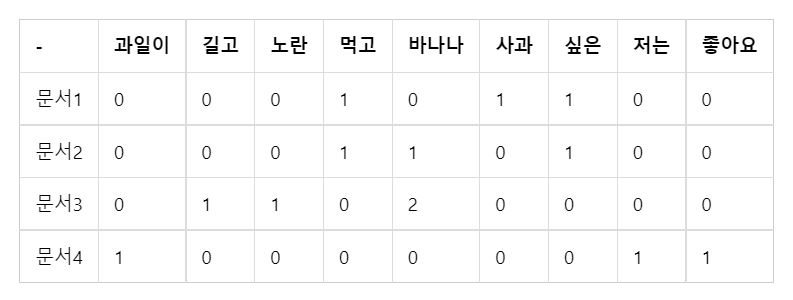

# TF

예제 1) A new car, used car, car review    

예제 문장의 TF score를 계산한 결과이다  
출처 : 허민석님 딥러닝 자연어 처리 TF-IDF 강의  



|word| TF |  
|:----|:----|
|a|1/7|  
|new|1/7|  
|car|3/7|  
|used|1/7|  
|review|1/7|  
 

-> car가 문장에서 가장 중요한 단어라고 유추 가능    

그러나 늘 그런 것은 아님 예를 들어, "a friend in need is a friend indeed"라는 문장이 있을 때,  
"a"와 "friend"가 모두 2번 출현하지만 해당 문장에서 중요한 단어는 friend이지 a가 아니기 때문이다.  
"a"와 같은 자주 등장하지만 큰 의미를 갖지 않는 불용어가 높은 점수를 가질 수 있다는 점에서 문서와 단어의 연관성을 나타내기엔 부족함을 알 수 있음.

# IDF

문서와 연관성이 없지만 빈번하게 출현하는 단어들에 대해 패널티를 부여하는 방식  
IDF를 구하는 공식은 다음과 같다.  

IDF = $log($총 문서의 개수 / 특정 단어가 출현한 문장의 개수$+ 1)$  
분모에 1을 더하는 이유는 분모가 0이 되는 수학적인 오류를 피하기 위함임

A : "a new car, used car, car review"  
B : "a friend in need is a friend indeed"  
위 두 문장의 IDF 값을 계산한 결과는 다음과 같다.  
출처 : 허민석님 딥러닝 자연어 처리 TF-IDF 강의  

|word|IDF |  
|:----|:----|
|a|Log(2/2)=0|  
|new|Log(2/1)=0.3|  
|car|Log(2/1)=0.3|  
|used|Log(2/1)=0.3|  
|review|Log(2/1)=0.3|  
|friend|Log(2/1)=0.3|  
|in|Log(2/1)=0.3|  
|need|Log(2/1)=0.3|  
|is|Log(2/1)=0.3|  
|indeed|Log(2/1)=0.3|  

# TF-IDF

1. TF-IDF 는 DTM 내의 각 단어에 대한 중요도에 따라 가중치를 부여
2. TF-IDF 는 TF와 IDF를 곱한 값



A : "a new car, used car, car review"  
B : "a friend in need is a friend indeed"  
위 두 문장의 TF-IDF 값을 계산한 결과는 다음과 같다.  
출처 : 허민석님 딥러닝 자연어 처리 TF-IDF 강의 

|word| TF(A) | TF(B) |IDF |TF-IDF(A)|TF-IDF(B)|  
|:----|:----|:----|:----|:----|:----|  
|a|1/7|2/8|Log(2/2)=0|0|0|  
|new|1/7|0|Log(2/1)=0.3|0.04|0|  
|**car**|3/7|0|Log(2/1)=0.3|**0.13**|0|  
|used|1/7|0|Log(2/1)=0.3|0.04|0|  
|review|1/7|0|Log(2/1)=0.3|0.04|0|  
|**friend**|0|2/8|Log(2/1)=0.3|0|**0.08**|  
|in|0|1/8|Log(2/1)=0.3|0|0.04|  
|need|0|1/8|Log(2/1)=0.3|0|0.04|  
|is|0|1/8|Log(2/1)=0.3|0|0.04|  
|indeed|0|1/8|Log(2/1)=0.3|0|0.04|  

-> 이처럼 두 문장과 가장 연관성이 높은 단어인 car와 friend의 값이 가장 높은 것을 확인할 수 있다!

In [2]:
import pandas as pd
from math import log

docs = [
    "먹고 싶은 사과",
    "먹고 싶은 바나나",
    "길고 노란 바나나 바나나",
    "저는 과일이 좋아요"
]
vocab = list(set(w for doc in docs for w in doc.split()))
# vocab = []
# for elem in docs:
#   for elem2 in elem.split():
#     vocab.append(elem2)
# vocab = set(vocab)

vocab.sort()

In [3]:
# 총 문서의 개수 n
n = len(docs)

# TF 함수
def tf(t,doc):
  return doc.count(t)

# IDF 함수
def idf(t):
  # df : 단어 t가 포함된 문장의 개수
  df = 0
  for doc in docs:
    if t in doc:
      df += 1
  return log(n/(df+1))

# TF-IDF 함수
def tf_idf(t,d):
  return tf(t,d)*idf(t)

In [12]:
# docs의 TF 구하기 -> DTM 만들기
DTM = []
for i in range(n):
  tmp = []
  for elem in vocab:
    tmp.append(tf(elem,docs[i]))
  DTM.append(tmp)

TF = pd.DataFrame(DTM, columns=vocab)
TF

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [13]:
# 각 단어에 대한 IDF 구하기
IDF = []
for elem in vocab:
  IDF.append(idf(elem))

IDF = pd.DataFrame(IDF, index=vocab, columns=["IDF"])
IDF

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [14]:
# TF-IDF 구하기
TFIDF = []
for doc in docs:
  tmp = []
  for voc in vocab:
    tmp.append(tf_idf(voc,doc))
  TFIDF.append(tmp)

TFIDF = pd.DataFrame(TFIDF, columns=vocab)
TFIDF

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147
